## Dogs vs. Cats
In this competition, you'll write an algorithm to classify whether images contain either a dog or a cat.  This is easy for humans, dogs, and cats. Your computer will find it a bit more difficult.


![](https://storage.googleapis.com/kaggle-competitions/kaggle/3362/media/woof_meow.jpg)

Deep Blue beat Kasparov at chess in 1997.  
Watson beat the brightest trivia minds at Jeopardy in 2011.  
Can you tell Fido from Mittens in 2013?  


## Your task:

1. Train your algorithm on these files and predict the labels (1 = dog, 0 = cat).
2. Deploy your model in herroku ! The user must have the possibility to upload a photo to test the model.

##  Dataset 
````
./dataset/
----> training_set/
--------> dog/
               image1
               image2
               .
               .
--------> cat/
               image1
               image2
               .
               .
----> test_set/
--------> dog/
               image1
               image2
               .
               .
--------> cat/
               image1
               image2
               .
           .
````

To load the dataset uses ImageDataGenerator : 
https://keras.io/preprocessing/image/

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2




In [52]:
# Train Set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.002
)

# Train Generator
train_generator = train_datagen.flow_from_directory(
    './dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    seed=42,
    shuffle=True,
    subset='training'
)

# Validation Generator
validation_generator = train_datagen.flow_from_directory(
    './dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    seed=42,
    shuffle=True,
    subset='validation'
)

Found 7984 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [53]:
# Test Set

test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False
)


test_generator = test_datagen.flow_from_directory(
    './dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    seed=42,
    shuffle=True
)

Found 2000 images belonging to 2 classes.


Model Training

### CallBacks

In [54]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='./dataset/best_model.h5', save_best_only=True)
]

In [55]:
model = Sequential()


model.add(Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [60]:
# compile --> Backpropagation

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=callbacks)



Epoch 1/15
250/250 [==============================] - 54s 211ms/step - loss: 0.3730 - accuracy: 0.8258 - val_loss: 0.8048 - val_accuracy: 0.5625
Epoch 2/15
250/250 [==============================] - 66s 262ms/step - loss: 0.3582 - accuracy: 0.8423 - val_loss: 0.8338 - val_accuracy: 0.6250
Epoch 3/15
250/250 [==============================] - 72s 286ms/step - loss: 0.3266 - accuracy: 0.8568 - val_loss: 0.5853 - val_accuracy: 0.6875
Epoch 4/15
250/250 [==============================] - 59s 233ms/step - loss: 0.3097 - accuracy: 0.8661 - val_loss: 0.9478 - val_accuracy: 0.7500
Epoch 5/15
250/250 [==============================] - 59s 234ms/step - loss: 0.2997 - accuracy: 0.8686 - val_loss: 0.6982 - val_accuracy: 0.7500
Epoch 6/15
250/250 [==============================] - 60s 238ms/step - loss: 0.2794 - accuracy: 0.8791 - val_loss: 0.7661 - val_accuracy: 0.6875
Epoch 7/15
250/250 [==============================] - 73s 292ms/step - loss: 0.2615 - accuracy: 0.8851 - val_loss: 1.0704 - val_ac

### Metrics definitions

+ loss: In classification error in predicting the class labels.In regression numeric difference that the model is trying to minimize during training.<br>
+ Validation Loss (val_loss): same has loss but base on val set that the model did not see during training.
+ Training Accuracy (accuracy): Ratio of correct prediction on Train set
+ Validation Accuracy (accuracy): Ratio of correct prediction on Validation set

### Overfitting use case

**Epoch 4/15**: The model is improving, and the accuracy on the validation set is increasing.

**Epoch 5/15**: It's possible that the model is overfitting. Overfitting occurs when a model learns the training data too well, including its noise and outliers. As a result, it may perform poorly on new, unseen data. In this case, the decrease in val_accuracy might indicate that the model is becoming too specific to the training data and is not generalizing well to new examples.

To address this, you might consider techniques such as adjusting the model architecture, using **regularization**, or **increasing** *the amount of training data.*


In [61]:
model_evaluation = model.evaluate(test_generator)

63/63 [==============================] - 9s 143ms/step - loss: 0.6595 - accuracy: 0.7375


In [62]:
result = {
    "Loss": model_evaluation[0],
    "Accuraccy": model_evaluation[1]
}

print(f'''Summary Evaluation:
      \nloss: {result["Loss"]}
      \naccuraccy: {result["Accuraccy"]}
      ''')

Summary Evaluation:
      
loss: 0.6594719886779785
      
accuraccy: 0.737500011920929
      


### Validation curves

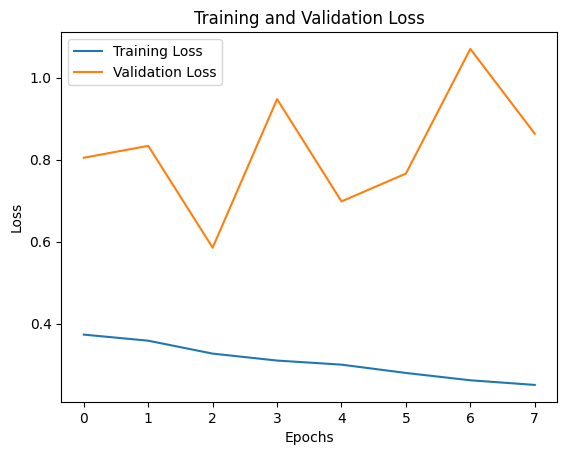

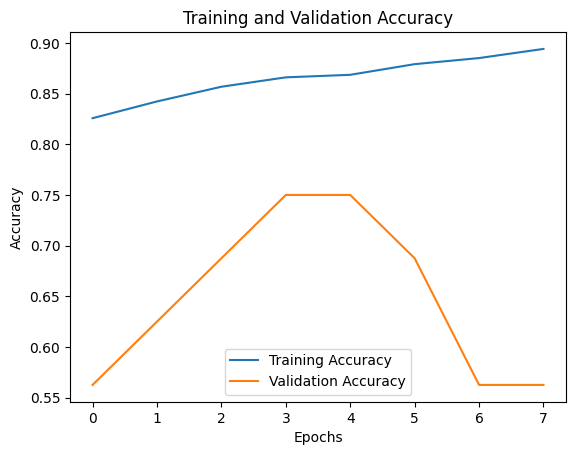

In [63]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the ERROR
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot training and validation curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [64]:
# Predict on the test set
test_predictions = model.predict(test_generator)

63/63 [==============================] - 10s 150ms/step


In [65]:
test_predictions

array([[0.82733136],
       [0.01014649],
       [0.9998276 ],
       ...,
       [0.01072564],
       [0.22011095],
       [0.528659  ]], dtype=float32)

In [67]:
test_predictions > threshold

array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [66]:
# To resolve this, we can use this threshold based on our problem
threshold = 0.5   

# Convert probabilities to class labels
test_predictions_binary = (test_predictions > threshold).astype(int)

In [68]:
# Print the predicted classes
print("Predictions:", test_predictions_binary)

Predictions: [[1]
 [0]
 [1]
 ...
 [0]
 [0]
 [1]]


In [69]:
true_labels = test_generator.classes

In [70]:
true_labels

array([0, 0, 0, ..., 1, 1, 1])

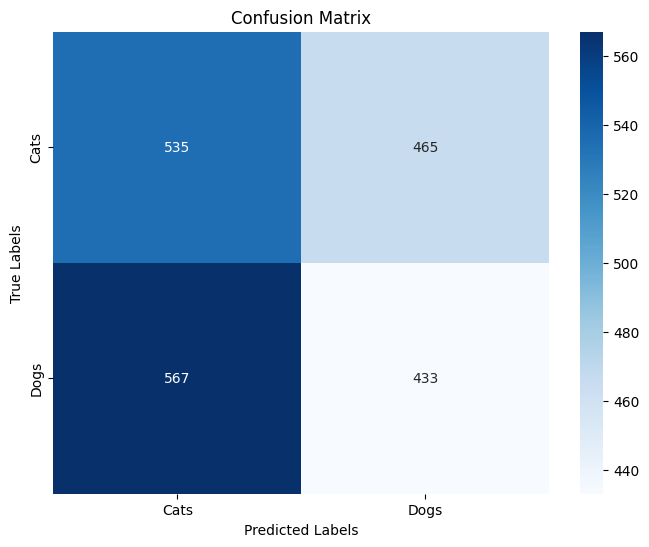

In [71]:


# True labels for your test set
true_labels = test_generator.classes

# Convert predicted probabilities to binary labels
predicted_labels_binary = (test_predictions > threshold).astype(int)



conf_matrix = confusion_matrix(true_labels, predicted_labels_binary)



# Display confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Blues", 
    xticklabels=["Cats", "Dogs"], 
    yticklabels=["Cats", "Dogs"])

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [75]:

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),
          activation='relu', kernel_regularizer=l2(0.0005))) # here
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.0005)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.0005))) #here
model.add(Dense(1, activation='sigmoid'))

# compile --> Backpropagation
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=["accuracy"])

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='./dataset/best_model.h5', save_best_only=True)
]

# Train the model and obtain the training history
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=callbacks
)

# Plot the training and validation curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/15
215/250 [========================>.....] - ETA: 9s - loss: 0.7193 - accuracy: 0.5608